In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

years = ['2013', '2014', '2015', '2016']
thresholds = list(range(5, 100, 2))

In [39]:
def weighted_minimum_union(df, threshold):
    result_set = []
    weight_sum = 0
    df = df.copy()
    
    while(weight_sum < threshold):
        if df.shape[0] == 0:
            break
        
        df["remaining"] = df["set"].apply(lambda s: [item for item in s if item not in result_set])
        df["len_remaining"] = df["remaining"].apply(lambda r: len(r))
        df["relative_weight"] = df.apply(lambda row: row["weight"] / len(row["remaining"]), axis = 1)
        top_row = df.sort_values("relative_weight", ascending = False).iloc[0]
        
        if weight_sum + top_row["weight"] < threshold:
            result_set.extend(top_row["remaining"])
            df,weight_sum = add_all_fully_covered_rows(df, result_set, weight_sum)
        else:
            crossing_threshold = df[df["weight"] >= (threshold - weight_sum)]
            best_crossing = crossing_threshold.sort_values(["len_remaining", "weight"], ascending = [True, False]).iloc[0]
            result_set.extend(best_crossing["remaining"])
            df,weight_sum = add_all_fully_covered_rows(df, result_set, weight_sum)
        
    return(result_set, weight_sum)
                                   
def add_all_fully_covered_rows(df, result_set, weight_sum):
    fully_covered = df["remaining"].map(lambda remaining: all(item in result_set for item in remaining))
    weight_sum = weight_sum + df[fully_covered]["weight"].sum()
    df = df[~fully_covered]
    return df, weight_sum
        

In [40]:
results = []

for index, year in enumerate(years):
    lines = open(f"../queryshapes{year}_2.txt").readlines()
    total_queries = int(lines[2].strip().split("\t")[1])
    counts = [(json.loads(left), int(right)) for left, right in (line.strip().split("\t") for line in lines[4:])]
    counts = [entry for entry in counts if len(entry[0]) > 0]
    df = pd.DataFrame(counts, columns=["set", "weight"])

    minimum_unions = []
    for threshold in thresholds:
        threshold_value = total_queries * threshold / 100
        result = weighted_minimum_union(df,threshold_value)
        minimum_unions.append(result)
        if result[1] < threshold_value:
            break
    res = [list(x) for x in zip(*[(len(result_set), weight_sum/total_queries) for result_set, weight_sum in minimum_unions])]
    
    results.append(res)
    
#     plt.subplot(221+index)
#     plt.ylim(0, 1)
#     plt.plot(res[0], res[1])
#     plt.title(year)
#     plt.xlabel('partitions')
#     plt.ylabel('percent of queries')
    
# plt.savefig('figure.png', dpi=200)

<IPython.core.display.Javascript object>


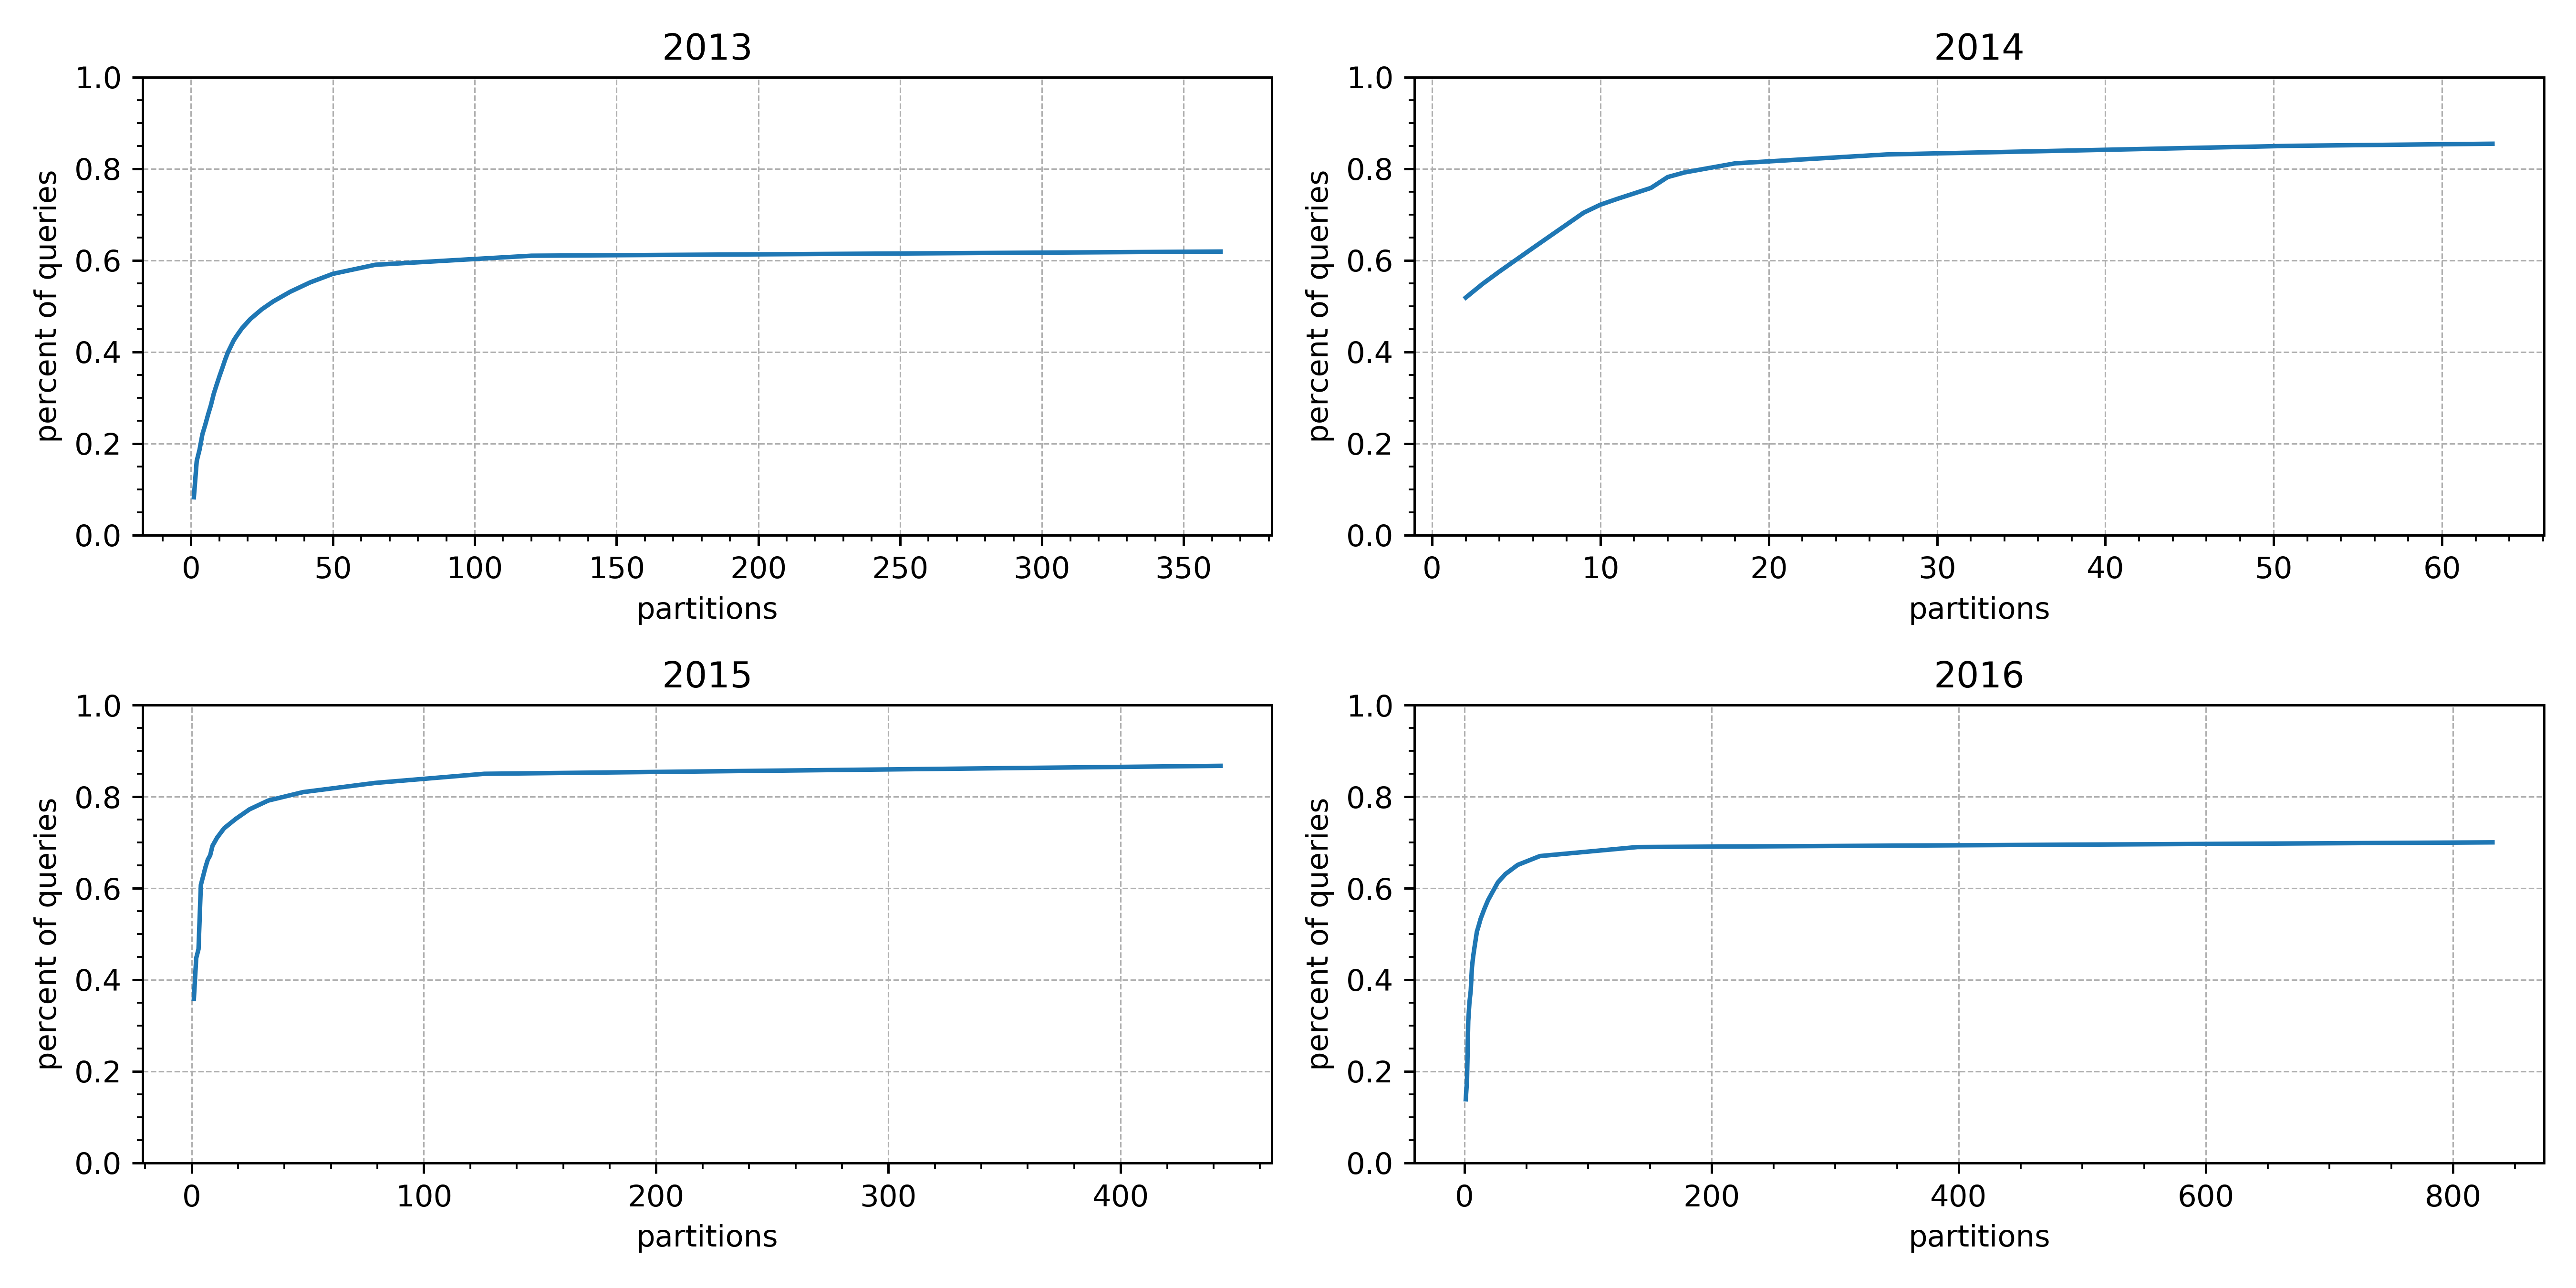

In [82]:
%matplotlib notebook
fig, axes = plt.subplots(2,2,figsize=(12,6),dpi=300)
axli = axes.flatten()
for index, res in enumerate(results):
    axli[index].set_ylim(0, 1)
    axli[index].minorticks_on()
    axli[index].grid(True, linestyle="--", lw=0.5)
    axli[index].plot(res[0], res[1])
    axli[index].set_title(2013+index)
    axli[index].set_xlabel('partitions')
    axli[index].set_ylabel('percent of queries')
    
fig.tight_layout()
fig.savefig("years_seperate.png")

In [72]:
year_dfs = []
total_queries = 0
for year in years:
    lines = open(f"../queryshapes{year}_2.txt").readlines()
    total_queries = total_queries + int(lines[2].strip().split("\t")[1])
    counts = [(json.loads(left), int(right)) for left, right in (line.strip().split("\t") for line in lines[4:])]
    counts = [entry for entry in counts if len(entry[0]) > 0]
    year_dfs.append(pd.DataFrame(counts, columns=["set", "weight"]))

In [73]:
import json
df = pd.concat(year_dfs)
df["set"] = df["set"].map(json.dumps)
df = df.groupby(df["set"]).sum().sort_values(by=['weight'], ascending=False).reset_index()
df["set"] = df["set"].map(json.loads)

In [85]:
minimum_unions = [weighted_minimum_union(df, total_queries * threshold / 100) for threshold in thresholds]
res_total = [list(x) for x in zip(*[(len(result_set), weight_sum/total_queries) for result_set, weight_sum in minimum_unions])]

<IPython.core.display.Javascript object>


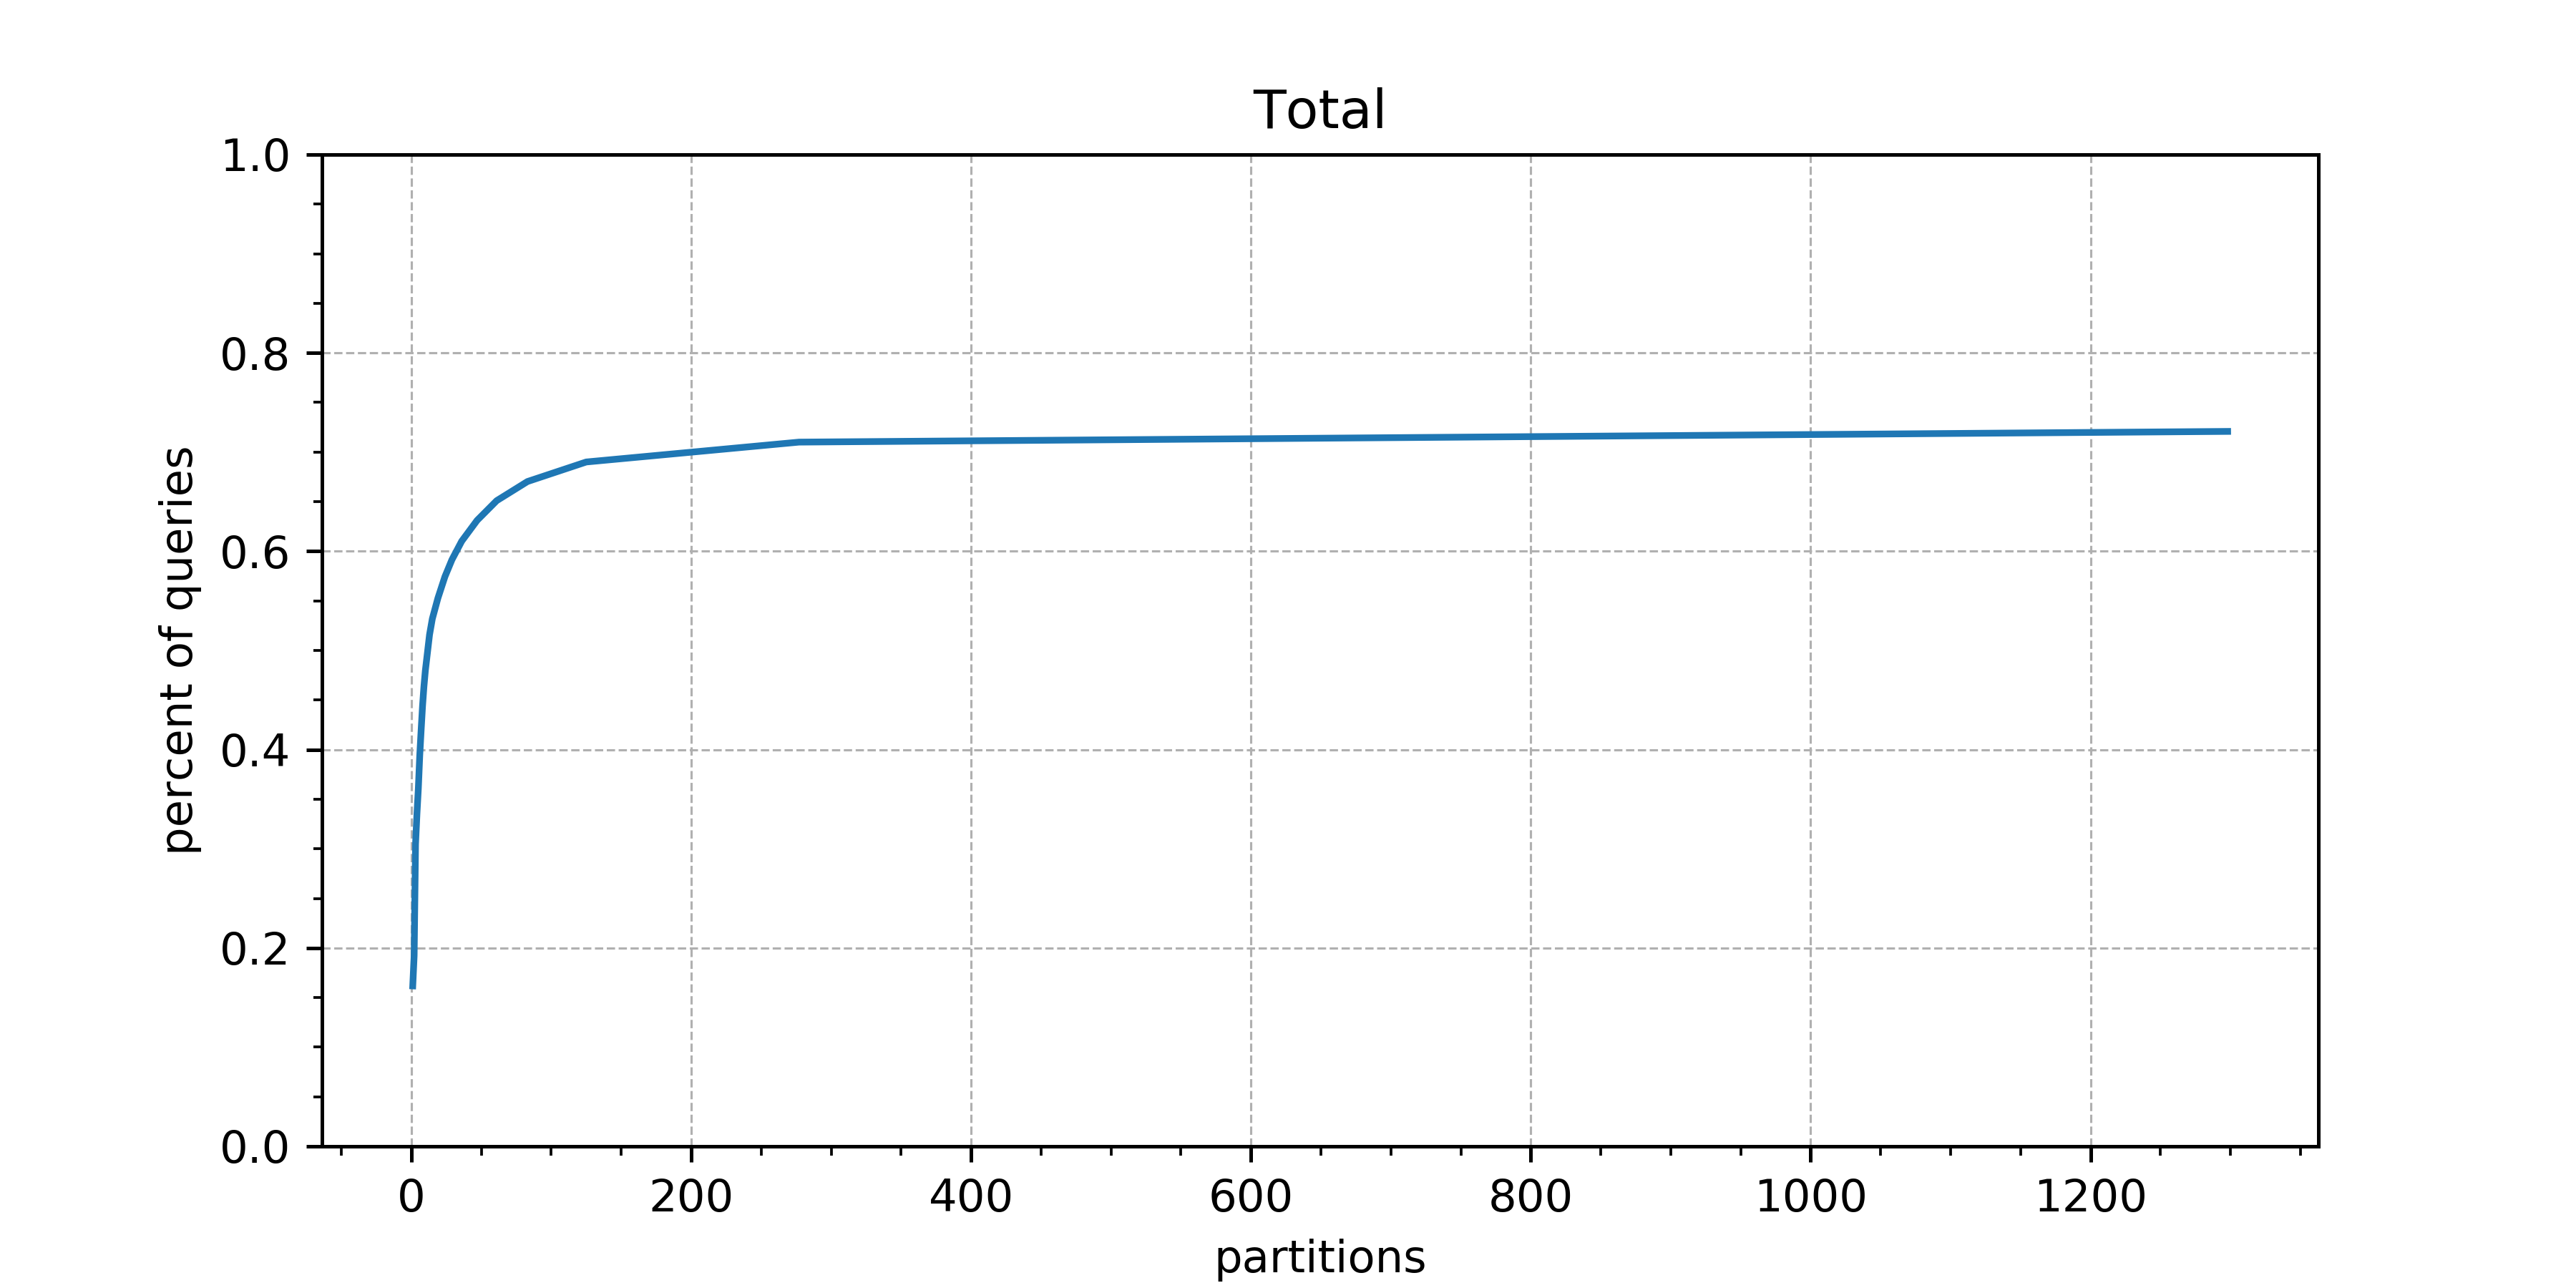

In [87]:
%matplotlib notebook

plt.figure(figsize=(8,4), dpi=300)
plt.ylim(0, 1)
plt.minorticks_on()
plt.grid(True, linestyle="--", lw=0.5)
plt.plot(res_total[0], res_total[1])
plt.title("Total")
plt.xlabel('partitions')
plt.ylabel('percent of queries')
plt.savefig("years_total.png")
plt.show()


In [97]:
minimum_unions1 = [(partitions, weight_sum / total_queries) for partitions, weight_sum in minimum_unions]
minimum_unions_70 = [item for item in minimum_unions1 if item[1] > 0.70 and item[1] < 0.72][0]
minimum_unions_70

(['9',
  '3,9',
  '3,9,79,223,515,1988',
  '3',
  '3,1101',
  '3,16,24,40,49,50,79,109',
  '16',
  '9,711,895,1472,1473,1474,1475,1476,1477',
  '3,16',
  '17',
  '363',
  '89',
  '47',
  '3,49,50',
  '9,17',
  '40',
  '5',
  '32',
  '3,89',
  '9,19',
  '19,236,261',
  '49,50',
  '7',
  '937',
  '3,347',
  '3,2290',
  '9,89',
  '9,16,82,129,317',
  '85',
  '27,47',
  '882',
  '1101',
  '3,5,7,9,61,500,537,951',
  '347',
  '26428',
  '15',
  '19',
  '3,16,40',
  '3,16,40,347',
  '3,9,16,40',
  '3,9,2294',
  '3,5,9,49,50,61,136,1473,1476',
  '3,5',
  '9,19,261,1658',
  '13',
  '3,9,19,261,1658',
  '3,17,32',
  '61',
  '168',
  '35',
  '24',
  '1332',
  '3,5,9,49,50,61,514',
  '9,711,895,1472,1473,1474,1476,1477',
  '3,5,30,49,50,847',
  '50',
  '49',
  '382',
  '7,9',
  '27,32,79',
  '18454',
  '7,9,514',
  '532',
  '363,532',
  '3,9,49,50,796',
  '3,9,24,27,32',
  '20',
  '3,9,19,206,261',
  '236',
  '1017',
  '579',
  '597',
  '435',
  '1033',
  '225',
  '30',
  '12935',
  '537',
  '170

In [107]:
resolved_partitions = []
predicate_map = { int(index): predicate for predicate, index in (line.split("\t") for line in open(f"../predicate-map.txt").readlines())}
for partition in minimum_unions_70[0]:
    indices = partition.split(',')
    predicates = ",".join([predicate_map[int(index)] for index in indices])
    resolved_partitions.append(predicates)

In [110]:
file = open("../partitions.txt", "w")
file.write("Total coverage: " + str(minimum_unions_70[1]) + "\n")
for part in resolved_partitions:
    file.write(part + "\n")